In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

root = 'benchmark/docking/pose_stats_raw'
methods = ['DiffDock', 'DeepDock','Interformer','InterMoBA']
all_df = []
for method in methods:
    a = pd.read_csv(f'/{root}/{method}_pose2stats.csv')
    a['method'] = method
    a['inter_type'] = a['inter_type'].astype(str).str.strip().str.capitalize()
    print(f"{method} inter_type: {a['inter_type'].unique()}")
    all_df.append(a)
    hbond_mean = a[a['inter_type'] == 'Hbond']['hit_rate'].mean() * 100
    hydro_mean = a[a['inter_type'] == 'Hydro']['hit_rate'].mean() * 100
    print(method)
    print(f"Hbond: {hbond_mean:.2f}%")
    print(f"Hydrophobic: {hydro_mean:.2f}%")
df = pd.concat(all_df).reset_index(drop=True)
df['inter_type'] = df['inter_type'].map(lambda x: x.capitalize())
df['inter_type'] = df['inter_type'].map(lambda x: x if x == 'Hbond' else 'Hydrophobic')
df['Interactions'] = df['method'] + '-' + df['inter_type']
df['hit_rate'] *= 100.

DiffDock inter_type: ['Hbond' 'Hydro']
DiffDock
Hbond: 30.55%
Hydrophobic: 19.33%
DeepDock inter_type: ['Hbond' 'Hydro']
DeepDock
Hbond: 21.45%
Hydrophobic: 15.50%
Interformer inter_type: ['Hbond' 'Hydro']
Interformer
Hbond: 50.22%
Hydrophobic: 38.51%
InterMoBA inter_type: ['Hbond' 'Hydro']
InterMoBA
Hbond: 63.74%
Hydrophobic: 54.69%


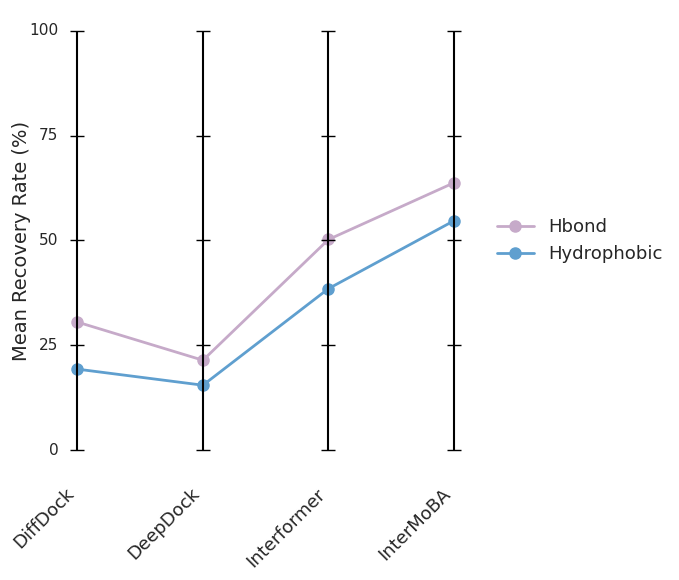

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

root = 'benchmark/docking/pose_stats_raw'
methods = ['DiffDock', 'DeepDock','Interformer','InterMoBA']
all_df = []
for method in methods:
    a = pd.read_csv(f'{root}/{method}_pose2stats.csv')
    a['method'] = method
    a['inter_type'] = a['inter_type'].astype(str).str.strip().str.capitalize()
    all_df.append(a)
df = pd.concat(all_df).reset_index(drop=True)
df['inter_type'] = df['inter_type'].map(lambda x: x.capitalize())
df['inter_type'] = df['inter_type'].map(lambda x: x if x == 'Hbond' else 'Hydrophobic')
df['hit_rate'] *= 100.

summary = df.groupby(['method', 'inter_type'])['hit_rate'].mean().unstack()
method_order = ['DiffDock', 'DeepDock', 'Interformer', 'InterMoBA']

summary = summary.reindex(method_order)

x = np.arange(len(summary.index))
y1 = summary['Hbond'].values
y2 = summary['Hydrophobic'].values
labels = summary.index

fig, ax = plt.subplots(figsize=(7,6))


ax.plot(x, y1, marker='o', color='#c6aac9', label='Hbond', linewidth=2, markersize=8)
ax.plot(x, y2, marker='o', color='#5f9fcf', label='Hydrophobic', linewidth=2, markersize=8)


for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)


ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=13)


for i in range(len(x)):
    ax.vlines(i, 0, 100, color='black', linewidth=1.5)

    for ytick in np.linspace(0, 100, 5):
        ax.plot(i, ytick, marker='_', color='black', markersize=10, zorder=3)
        if i == 0:  
            ax.text(i-0.15, ytick, f'{int(ytick)}', va='center', ha='right', fontsize=11)


ax.set_yticks([])
ax.set_ylabel('Mean Recovery Rate (%)', fontsize=14, labelpad=20)


ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=13, frameon=False)


plt.box(False)
plt.tight_layout()
plt.show()

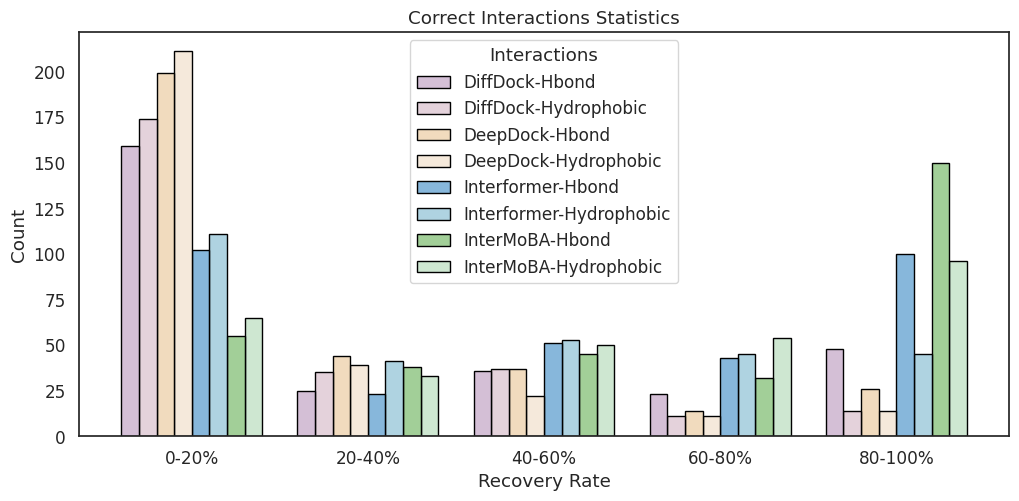

In [21]:
sns.set(font_scale=1.1)
sns.set_style("white")
fig = plt.figure(figsize=(12, 5.25))
colors = ['#f9d62e', '#ffe981', '#fc913a', '#ffc08c', '#c9df8a', '#f0f7da', '#36802d', '#77ab59']
colors = ['#c6aac9', '#dcc3cf', '#edd0a8', '#f2e2cf', '#5f9fcf', '#94c5d8', '#83c076', '#bedfc2']
#colors = ['#f9d62e', '#ffe981', '#fc913a', '#ffc08c', '#36802d', '#77ab59', '#c9df8a', '#f0f7da']
sns.histplot(data=df, x='hit_rate', hue='Interactions', edgecolor='black', bins=5, palette=colors, shrink=.8,
             multiple="dodge").set_title('Correct Interactions Statistics')
plt.xlabel('Recovery Rate')
bin_centers = np.linspace(10, 90, 5)
plt.xticks(bin_centers, ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

plt.show()